EJERCICIO 1

In [5]:
!pip install geopandas

In [6]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.1 MB/s eta 0:00:00


In [7]:
import geopandas as gpd
from fiona import listlayers
countries=gpd.read_file("https://github.com/AdriMA3/introgeodf/raw/refs/heads/main/maps/World_Countries/World_Countries.shp")
#ferrovias=gpd.read_file("https://github.com/AdriMA3/introgeodf/raw/refs/heads/main/maps/Red_Ferroviaria/Red_ferroviaria.shp")

In [8]:
chile=countries[countries.COUNTRY=="Chile"]
chile_5361=chile.to_crs(5361)

In [9]:
airports=gpd.read_file("https://github.com/AdriMA3/introgeodf/raw/refs/heads/main/data/chile-airports.csv")

In [10]:
airports=gpd.GeoDataFrame(data=airports.copy(),
                 geometry=gpd.points_from_xy(airports.longitude_deg,
                                             airports.latitude_deg),
                 crs=chile.crs.to_epsg())
airports_5361=airports.to_crs(5361)

In [11]:
import pandas as pd

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [14]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [15]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)# notice it is unprojected

# keep Brazil
seaports_chi=seaports[seaports['Country Code']=='Chile'].copy()

# reset indexes
seaports_chi.reset_index(drop=True, inplace=True)

# reprojecting
seaports_chi_5361=seaports_chi.to_crs(5361) # projected crs

In [16]:
# subsetting
mediumAirports=airports[airports['type']=='medium_airport'] #can't use "airports.type"
mediumAirports.reset_index(drop=True, inplace=True)
mediumAirports.head()

id ident            type  \
0  6009  SCCI  medium_airport   
1  6043  SCTE  medium_airport   
2  6026  SCIP  medium_airport   
3  6007  SCCF  medium_airport   
4  6018  SCFA  medium_airport   

                                                name         latitude_deg  \
0  President Carlos Ibañez del Campo Internationa...           -53.002602   
1                                  El Tepual Airport  -41.438899993896484   
2                                   Mataveri Airport       -27.1648006439   
3                                     El Loa Airport           -22.498199   
4        Andrés Sabella Gálvez International Airport           -23.444501   

        longitude_deg elevation_ft continent country_name iso_country  ...  \
0          -70.854599          139        SA        Chile          CL  ...   
1  -73.09400177001953          294        SA        Chile          CL  ...   
2       -109.42199707          227        SA        Chile          CL  ...   
3          -68.903603         7543        SA        Chile          CL  ...   
4          -70.445099          455        SA        Chile          CL  ...   

  gps_code icao_code iata_code local_code home_link  \
0     SCCI      SCCI       PUQ                        
1     SCTE      SCTE       PMC                        
2     SCIP      SCIP       IPC                        
3     SCCF      SCCF       CJC                        
4     SCFA      SCFA       ANF                        

                                      wikipedia_link                 keywords  \
0  https://en.wikipedia.org/wiki/Carlos_Ibanez_De...                            
1    https://en.wikipedia.org/wiki/El_Tepual_Airport                            
2  https://en.wikipedia.org/wiki/Mataveri_Interna...  Rapa Nui, Easter Island   
3       https://en.wikipedia.org/wiki/El_Loa_Airport                            
4  https://en.wikipedia.org/wiki/Andr%C3%A9s_Sabe...     Cerro Moreno Airport   

  score               last_updated                   geometry  
0   750  2021-12-22T15:07:05+00:00  POINT (-70.8546 -53.0026)  
1   750  2008-07-12T07:26:32+00:00   POINT (-73.094 -41.4389)  
2   750  2011-10-28T10:05:26+00:00  POINT (-109.422 -27.1648)  
3   750  2024-04-29T19:45:32+00:00  POINT (-68.9036 -22.4982)  
4   750  2019-02-15T15:15:06+00:00  POINT (-70.4451 -23.4445)  

[5 rows x 25 columns]

In [17]:
# Reproyectar ambos GeoDataFrames a CRS proyectado para Chile
seaports_chi_5361 = seaports_chi.to_crs(epsg=5361)
mediumAirports_5361 = mediumAirports.to_crs(epsg=5361)


In [18]:
# Crear matriz de distancias (km) con índices organizados
distanceMatrixKM = seaports_chi_5361.set_index('portName').geometry.apply(
    lambda g: mediumAirports_5361.set_index('name').geometry.distance(g) / 1000
)

# Ordenar por índices para que se vea ordenado
distanceMatrixKM = distanceMatrixKM.sort_index(axis=0).sort_index(axis=1)

# Mostrar parte de la matriz
distanceMatrixKM.head()


name                 Andrés Sabella Gálvez International Airport  \
portName                                                           
Antofagasta                                            22.940637   
Bahia Agua Fresca                                    3323.291208   
Bahia De Valdivia                                    1833.539735   
Bahia De Valparaiso                                  1068.946150   
Bahia Harris                                         3374.743679   

name                 Balmaceda Airport  Barriles Airport  \
portName                                                   
Antofagasta                2472.864745        170.961872   
Bahia Agua Fresca           832.129552       3467.953403   
Bahia De Valdivia           691.687551       1981.761205   
Bahia De Valparaiso        1430.651373       1216.684847   
Bahia Harris                886.830961       3519.008142   

name                 Captain Fuentes Martinez Airport  Carriel Sur Airport  \
portName                                                                     
Antofagasta                               3285.596330          1477.370401   
Bahia Agua Fresca                           45.485040          1853.910946   
Bahia De Valdivia                         1512.472356           336.845978   
Bahia De Valparaiso                       2248.722965           435.704955   
Bahia Harris                                66.910109          1909.247021   

name                 Cañal Bajo Carlos Hott Siebert Airport  \
portName                                                      
Antofagasta                                     1897.808345   
Bahia Agua Fresca                               1429.114399   
Bahia De Valdivia                                 91.604626   
Bahia De Valparaiso                              851.304473   
Bahia Harris                                    1485.162268   

name                 Chacalluta Airport  Chañaral Airport  \
portName                                                    
Antofagasta                  586.939017        297.737139   
Bahia Agua Fresca           3887.468225       3003.357477   
Bahia De Valdivia           2395.295895       1514.434726   
Bahia De Valparaiso         1632.011796        749.240496   
Bahia Harris                3938.813770       3054.994445   

name                 Chile Chico Airport  Cochrane Airport  ...  \
portName                                                    ...   
Antofagasta                  2546.887085       2625.362563  ...   
Bahia Agua Fresca             758.093206        692.682429  ...   
Bahia De Valdivia             764.655835        829.431954  ...   
Bahia De Valparaiso          1504.811883       1580.688617  ...   
Bahia Harris                  812.998363        750.297332  ...   

name                 Mataveri Airport  Nuevo Chaitén Airport  \
portName                                                       
Antofagasta               4213.139786            2134.261522   
Bahia Agua Fresca         4601.174929            1187.154111   
Bahia De Valdivia         3888.592172             333.329655   
Bahia De Valparaiso       3955.007034            1087.922271   
Bahia Harris              4656.461753            1243.387734   

name                 Panguilemo Airport  Pichoy Airport  \
portName                                                  
Antofagasta                 1305.090964     1792.593794   
Bahia Agua Fresca           2001.452201     1535.633295   
Bahia De Valdivia            512.292563       21.816091   
Bahia De Valparaiso          260.147625      746.470033   
Bahia Harris                2054.599389     1591.509722   

name                 President Carlos Ibañez del Campo International Airport  \
portName                                                                       
Antofagasta                                                3258.036259         
Bahia Agua Fresca                                            43.019862         
Bahia De Valdivia               

In [19]:
distanceMatrixKM_sea_air = (
    seaports_chi_5361.set_index('portName').geometry.apply(
        lambda g: mediumAirports_5361.set_index('name').geometry.distance(g) / 1000
    )
).sort_index(axis=0).sort_index(axis=1)


In [20]:
port_point=seaports_chi_5361[seaports_chi_5361['portName']== "Bahia Harris"]
closest_point1=mediumAirports[mediumAirports['name']=='President Carlos Ibañez del Campo International Airport']
closest_point2=mediumAirports[mediumAirports['name']=='Captain Fuentes Martinez Airport']

In [21]:
# Reproyectar puntos individuales
port_point_proj = port_point.to_crs(epsg=5361)
closest_point1_proj = closest_point1.to_crs(epsg=5361)
closest_point2_proj = closest_point2.to_crs(epsg=5361)


<Axes: >

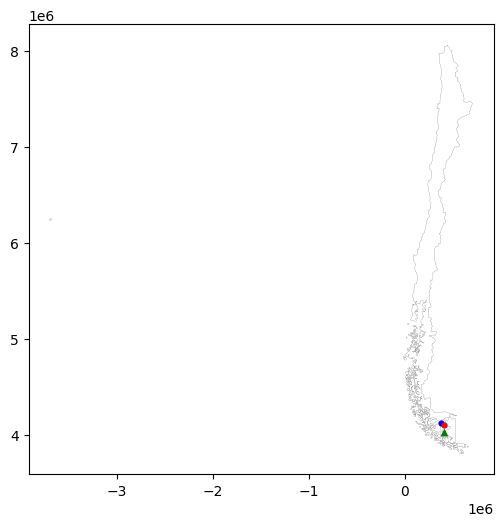

In [22]:
base=chile_5361.plot(facecolor='white',
                 edgecolor='black',
                 linewidth=0.1,
                 figsize=(6,6))
port_point.plot(facecolor='green',linewidth=0,marker="^",
                ax=base,markersize=30,zorder=5)
closest_point1_proj.plot(facecolor='blue',linewidth=0,
                ax=base,markersize=20,zorder=5)
closest_point2_proj.plot(facecolor='red',linewidth=0,
                ax=base,markersize=20,zorder=5)

Ejercicio 2

In [23]:
import geopandas as gpd
from fiona import listlayers
hidrografia=gpd.read_file("https://github.com/AdriMA3/Tarea2G/raw/refs/heads/main/maps/Red_Hidrografica/Red_Hidrografica.shp")

In [24]:
#asignaremos un crs conocido para luego poroyectar
# Asegurar que ambos estén en el mismo CRS antes del clip
hidrografia_aligned = hidrografia.to_crs(chile.crs)

# Realizar el clip
hidrografiaChile_clipped = gpd.clip(hidrografia_aligned, chile)

# Luego proyectar al CRS deseado (por ejemplo EPSG:5361)
hidrografia_chile_5361 =  hidrografiaChile_clipped.to_crs(5361)

In [25]:
hidrografia_chile_5361.head()

objectid  fid_drenes  cod_comuna   shape_leng    st_length_      Nombre  \
4243      4286       31936        1240  9673.323324  15831.851676  Río Volcan   
4242      4285       31936        1240     0.002220      0.003612  Río Volcan   
3106      3149       68837        1130  2246.652440   3381.047573        None   
3093      3136       68799        1130  1505.446980   2266.294719        None   
2941      2968       68685        1130  1163.005615   1750.726277        None   

     Dren_Tipo                                     Region         Provincia  \
4243       Río   Región de Magallanes y Antártica Chilena  Ultima Esperanza   
4242       Río   Región de Magallanes y Antártica Chilena  Ultima Esperanza   
3106  Quebrada  Región de Aysén del Gral.Ibañez del Campo      Capitán Prat   
3093  Quebrada  Región de Aysén del Gral.Ibañez del Campo      Capitán Prat   
2941  Quebrada  Región de Aysén del Gral.Ibañez del Campo      Capitán Prat   

       Comuna                                           geometry  
4243  Natales  LINESTRING (189727.27 4184887.299, 189760.717 ...  
4242  Natales  LINESTRING (189727.268 4184887.298, 189727.27 ...  
3106   Tortel  LINESTRING (152514.392 4626409.814, 152571.086...  
3093   Tortel  LINESTRING (152514.392 4626409.814, 152497.027...  
2941   Tortel  LINESTRING (151852.068 4627342.785, 151871.722...

In [26]:
# Seleccionar el río
single_line = hidrografia_chile_5361[hidrografia_chile_5361['Nombre'] == 'Río Volcan']

# Calcular distancias en km del río a todos los aeropuertos medianos
distanceMatrixKM_hidro = (
    single_line.set_index('Nombre').geometry.apply(
        lambda g: mediumAirports_5361.set_index('name').geometry.distance(g) / 1000
    )
).sort_index(axis=0)

# Mostrar resultado
distanceMatrixKM_hidro


name        President Carlos Ibañez del Campo International Airport  \
Nombre                                                                
Río Volcan                                         191.041139         
Río Volcan                                         194.981921         
Río Volcan                                         187.499808         
Río Volcan                                         189.071192         
Río Volcan                                         186.520260         
Río Volcan                                        2118.034101         
Río Volcan                                        2121.016784         
Río Volcan                                        2122.639069         
Río Volcan                                        2124.592399         
Río Volcan                                        2130.863314         
Río Volcan                                        2131.126431         
Río Volcan                                        2131.843189         
Río Volcan                                        2131.918691         
Río Volcan                                        2131.957949         
Río Volcan                                        2132.142538         
Río Volcan                                        2127.919034         
Río Volcan                                        2130.616935         
Río Volcan                                        2130.464575         
Río Volcan                                        2130.632953         
Río Volcan                                        2130.517518         

name        El Tepual Airport  Mataveri Airport  El Loa Airport  \
Nombre                                                            
Río Volcan        1219.950585       4395.029503     3342.303390   
Río Volcan        1219.950585       4395.029501     3342.508387   
Río Volcan        1220.299335       4400.639220     3341.896185   
Río Volcan        1220.315269       4398.739622     3342.267597   
Río Volcan        1219.215611       4402.013832     3340.629100   
Río Volcan         875.867850       4106.602797     1269.480266   
Río Volcan         878.689617       4106.530687     1267.852392   
Río Volcan         880.289196       4106.348454     1265.930458   
Río Volcan         882.055885       4105.862021     1262.581684   
Río Volcan         886.224551       4099.450065     1258.030002   
Río Volcan         885.037364       4092.561981     1259.569197   
Río Volcan         885.195533       4091.607886     1259.650908   
Río Volcan         884.931729       4090.437630     1259.708935   
Río Volcan         884.724261       4088.836305     1259.681572   
Río Volcan         884.143816       4085.317592     1259.484542   
Río Volcan         885.381201       4103.650233     1258.042684   
Río Volcan         885.046959       4095.851860     1260.644823   
Río Volcan         885.020108       4096.167448     1260.313958   
Río Volcan         885.564930       4097.780930     1260.159035   
Río Volcan         884.807542       4094.320787     1260.119712   

name        Andrés Sabella Gálvez International Airport  \
Nombre                                                    
Río Volcan                                  3225.716669   
Río Volcan                                  3225.748145   
Río Volcan                                  3225.489617   
Río Volcan                                  3225.731013   
Río Volcan                                  3224.285359   
Río Volcan                                  1161.306169   
Río Volcan                                  1159.696159   
Río Volcan                                  1157.719653   
Río Volcan                                  1154.428830   
Río Volcan                                  1149.425218   
Río Volcan                                  1149.574345   
Río Volcan                                  1149.550295   
Río Volcan                                  1149.496891   
Río Volcan                                  1149.200773   
Río Volcan        

In [32]:
!pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.1 MB/s eta 0:00:00


In [28]:
closest_airports=mediumAirports_5361[mediumAirports_5361['name']=='President Carlos Ibañez del Campo International Airport']
farthest_airports=mediumAirports_5361[mediumAirports_5361['name']=='Andrés Sabella Gálvez International Airport']

In [29]:
farthest_airport = mediumAirports[mediumAirports['name'] =='Andrés Sabella Gálvez International Airport']
farthest_airport_5361 = farthest_airport.to_crs(epsg=5361)


In [33]:
# Mapa interactivo del río
m = single_line.explore(color='black', tooltip='Nombre')  # ¡Usa 'Nombre' con mayúscula!

# Agregar puertos con sus nombres también
closest_airports.explore(m=m, color='red', marker_kwds=dict(radius=5), tooltip='name')
farthest_airport_5361.explore(m=m, color='green', marker_kwds=dict(radius=5), tooltip='name')



ejercicio 3

In [34]:
hidrografia_chile_5361.head()

objectid  fid_drenes  cod_comuna   shape_leng    st_length_      Nombre  \
4243      4286       31936        1240  9673.323324  15831.851676  Río Volcan   
4242      4285       31936        1240     0.002220      0.003612  Río Volcan   
3106      3149       68837        1130  2246.652440   3381.047573        None   
3093      3136       68799        1130  1505.446980   2266.294719        None   
2941      2968       68685        1130  1163.005615   1750.726277        None   

     Dren_Tipo                                     Region         Provincia  \
4243       Río   Región de Magallanes y Antártica Chilena  Ultima Esperanza   
4242       Río   Región de Magallanes y Antártica Chilena  Ultima Esperanza   
3106  Quebrada  Región de Aysén del Gral.Ibañez del Campo      Capitán Prat   
3093  Quebrada  Región de Aysén del Gral.Ibañez del Campo      Capitán Prat   
2941  Quebrada  Región de Aysén del Gral.Ibañez del Campo      Capitán Prat   

       Comuna                                           geometry  
4243  Natales  LINESTRING (189727.27 4184887.299, 189760.717 ...  
4242  Natales  LINESTRING (189727.268 4184887.298, 189727.27 ...  
3106   Tortel  LINESTRING (152514.392 4626409.814, 152571.086...  
3093   Tortel  LINESTRING (152514.392 4626409.814, 152497.027...  
2941   Tortel  LINESTRING (151852.068 4627342.785, 151871.722...

In [35]:
hidro_lines_by_region=hidrografia_chile_5361.dissolve(by='Region')
hidro_lines_by_region.reset_index(drop=False, inplace=True)
hidro_lines_by_region.drop(columns=['objectid','fid_drenes','cod_comuna','shape_leng','st_length_','Dren_Tipo'],inplace=True)
hidro_lines_Magallanes_Antartida=hidro_lines_by_region[hidro_lines_by_region['Region']=='Región de Magallanes y Antártica Chilena']

In [36]:
hidro_lines_Magallanes_Antartida.convex_hull

12    POLYGON ((581364.81 3876015.596, 563792.703 38...
dtype: geometry

In [37]:
hidro_lines_Magallanes_Antartida.convex_hull.plot()

<Axes: >

In [38]:
lines_Magallanes_hulls=hidro_lines_Magallanes_Antartida.convex_hull.to_frame()
lines_Magallanes_hulls['Region']=['Región de Magallanes y Antártica Chilena']
lines_Magallanes_hulls.rename(columns={0:'geometry'},inplace=True)
lines_Magallanes_hulls=lines_Magallanes_hulls.set_geometry('geometry')
lines_Magallanes_hulls


geometry  \
12  POLYGON ((581364.81 3876015.596, 563792.703 38...   

                                      Region  
12  Región de Magallanes y Antártica Chilena

In [39]:
distanceMatrixKM_linesHull=lines_Magallanes_hulls.set_index('Region').geometry.apply\
(lambda g: mediumAirports_5361.set_index('name').geometry.distance(g)/1000)\
.sort_index(axis=1)
distanceMatrixKM_linesHull

name                                      Andrés Sabella Gálvez International Airport  \
Region                                                                                  
Región de Magallanes y Antártica Chilena                                  2842.207391   

name                                      Balmaceda Airport  Barriles Airport  \
Region                                                                          
Región de Magallanes y Antártica Chilena          384.11785       2989.718127   

name                                      Captain Fuentes Martinez Airport  \
Region                                                                       
Región de Magallanes y Antártica Chilena                               0.0   

name                                      Carriel Sur Airport  \
Region                                                          
Región de Magallanes y Antártica Chilena          1347.876385   

name                                      Cañal Bajo Carlos Hott Siebert Airport  \
Region                                                                             
Región de Magallanes y Antártica Chilena                              922.774781   

name                                      Chacalluta Airport  \
Region                                                         
Región de Magallanes y Antártica Chilena          3405.07226   

name                                      Chañaral Airport  \
Region                                                       
Región de Magallanes y Antártica Chilena       2522.319723   

name                                      Chile Chico Airport  \
Region                                                          
Región de Magallanes y Antártica Chilena           322.502245   

name                                      Cochrane Airport  ...  \
Region                                                      ...   
Región de Magallanes y Antártica Chilena        222.616636  ...   

name                                      Mataveri Airport  \
Region                                                       
Región de Magallanes y Antártica Chilena        4108.12686   

name                                      Nuevo Chaitén Airport  \
Region                                                            
Región de Magallanes y Antártica Chilena             686.003741   

name                                      Panguilemo Airport  Pichoy Airport  \
Region                                                                         
Región de Magallanes y Antártica Chilena         1515.179809     1028.924551   

name                                      President Carlos Ibañez del Campo International Airport  \
Region                                                                                              
Región de Magallanes y Antártica Chilena                                                0.0         

name                                      Ricardo García Posada Airport  \
Region                                                                    
Región de Magallanes y Antártica Chilena                    2534.653706   

name                                      Teniente Vidal Airport  \
Region                                                             
Región de Magallanes y Antártica Chilena              401.102147   

name                                      Vallenar Airport  Victoria Airport  \
Region                                                                         
Región de Magallanes y Antártica Chilena       2271.366361       1190.889578   

name                                      Viña del Mar Airport  
Region                                                          
Región de Magallanes y Antártica Chilena           1783.954673  

[1 rows x 32 columns]

In [40]:
closest_airports_1=mediumAirports_5361[mediumAirports_5361['name']=='Captain Fuentes Martinez Airport']
closest_airports_2=mediumAirports_5361[mediumAirports_5361['name']=='President Carlos Ibañez del Campo International Airport']
farthest_airports_1=mediumAirports_5361[mediumAirports_5361['name']=='Chañaral Airport']

In [41]:
farthest_airports_1 = farthest_airports_1.to_crs(5361)


In [42]:
base=lines_Magallanes_hulls.explore()
mins=distanceMatrixKM_linesHull.idxmin(axis=1)
closest_airports_1.explore(m=base, color='red', marker_kwds=dict(radius=10))
closest_airports_2.explore(m=base, color='blue', marker_kwds=dict(radius=10))
farthest_airports_1.explore(m=base, color='green', marker_kwds=dict(radius=10))


Ejercicio4

In [48]:
import geopandas as gpd

# URL del servicio de ArcGIS REST con capa de líneas eléctricas
url = "https://ide-energia.minenergia.cl/server/rest/services/IDE_Energia/Visor_IDE_Energ%C3%ADa/MapServer/10/query"

# Descargar todas las líneas eléctricas como GeoDataFrame
electric_lines = gpd.read_file(
    f"{url}?where=1=1&outFields=*&f=geojson"
)

# Verificar carga exitosa
print(electric_lines.shape)
electric_lines.head()


(1052, 22)


OBJECTID  ID_LIN_TRANS  SUBTIPO                                    NOMBRE  \
0      1041         134.0      100              ANCOA - ALTO JAHUEL 500KV L1   
1      1042         814.0      100              ANCOA - ALTO JAHUEL 500KV L2   
2      1043         864.0      100              ANCOA - ALTO JAHUEL 500KV L3   
3      1044         889.0      100              ANCOA - ALTO JAHUEL 500KV L4   
4      1045         904.0      100  NUEVA CARDONES - NUEVA MAITENCILLO 500KV   

  CIRCUITO      TIPO    F_OPERACIO     LONG_KM  \
0       C1  NACIONAL  1.126570e+12  240.253297   
1       C1  NACIONAL  1.420070e+12  257.757360   
2      S/I  NACIONAL  1.420070e+12  256.467637   
3      S/I  NACIONAL  1.420070e+12  256.297624   
4  C1 - C2  NACIONAL  1.515888e+12  139.902808   

                                TRAMO  \
0              ANCOA - ALTO JAHUEL C1   
1              ANCOA - ALTO JAHUEL C2   
2                 ANCOA - ALTO JAHUEL   
3                 ANCOA - ALTO JAHUEL   
4  NUEVA CARDONES - NUEVA MAITENCILLO   

                                 PROPIEDAD  ...  SIST_ELECT        ESTADO  \
0                           TRANSELEC S.A.  ...         SEN  EN OPERACION   
1                           TRANSELEC S.A.  ...         SEN  EN OPERACION   
2  ALTO JAHUEL TRANSMISORA DE ENERGÍA S.A.  ...         SEN  EN OPERACION   
3  ALTO JAHUEL TRANSMISORA DE ENERGÍA S.A.  ...         SEN  EN OPERACION   
4                          INTERCHILE S.A.  ...         SEN  EN OPERACION   

                                              REGION  \
0  METROPOLITANA DE SANTIAGO-LIBERTADOR GENERAL B...   
1  METROPOLITANA DE SANTIAGO-LIBERTADOR GENERAL B...   
2  METROPOLITANA DE SANTIAGO-LIBERTADOR GENERAL B...   
3  METROPOLITANA DE SANTIAGO-LIBERTADOR GENERAL B...   
4                                            ATACAMA   

                                        PROVINCIA  \
0  MAIPO-CURICO-COLCHAGUA-CACHAPOAL-LINARES-TALCA   
1  MAIPO-CURICO-COLCHAGUA-CACHAPOAL-LINARES-TALCA   
2  MAIPO-CURICO-COLCHAGUA-CACHAPOAL-LINARES-TALCA   
3  MAIPO-CURICO-COLCHAGUA-CACHAPOAL-LINARES-TALCA   
4                                  HUASCO-COPIAPO   

                                              COMUNA FUENTE_BAS  \
0  MOSTAZAL-BUIN-GRANEROS-CODEGUA-PAINE-RANCAGUA-...        CEN   
1  MOSTAZAL-BUIN-GRANEROS-PAINE-SAN BERNARDO-DONI...        CEN   
2  MOSTAZAL-BUIN-CODEGUA-PAINE-SAN FERNANDO-RIO C...        CEN   
3  MOSTAZAL-BUIN-CODEGUA-PAINE-SAN FERNANDO-RIO C...        CEN   
4                          FREIRINA-COPIAPO-VALLENAR        CEN   

       FECH_CREA       FECH_ACT  SHAPE.STLength()  \
0  1556236800000  1714435200000          2.245320   
1  1556236800000  1714435200000          2.431573   
2  1513728000000  1714435200000          2.432870   
3  1513728000000  1714435200000          2.431254   
4  1556236800000  1714435200000          1.303026   

                                            geometry  
0  LINESTRING (-71.38073 -35.6829, -71.38105 -35....  
1  LINESTRING (-71.38073 -35.68302, -71.38105 -35...  
2  LINESTRING (-71.37801 -35.68121, -71.37784 -35...  
3  LINESTRING (-71.37784 -35.68053, -71.37711 -35...  
4  LINESTRING (-70.4269 -27.51888, -70.42733 -27....  

[5 rows x 22 columns]

In [49]:
# Cambiar proyección a 5361 (metros en Chile)
electric_lines_5361 = electric_lines.to_crs(epsg=5361)


In [52]:
# Seleccionar por nombre
linea_seleccionada = electric_lines_5361[electric_lines_5361['TRAMO'].str.contains('ANCOA - ALTO JAHUEL C2', na=False)]


In [56]:
# Calcular matriz de distancia (km)
distanceMatrix_km = (
    linea_seleccionada.set_index('TRAMO').geometry.apply(
        lambda g:airports_5361.set_index('name').geometry.distance(g) / 1000
    )
)
distanceMatrix_km


name                    Comodoro Arturo Merino Benítez International Airport  \
TRAMO                                                                          
ANCOA - ALTO JAHUEL C2                                          32.821931      

name                    President Carlos Ibañez del Campo International Airport  \
TRAMO                                                                             
ANCOA - ALTO JAHUEL C2                                        1924.906462         

name                    El Tepual Airport  Mataveri Airport  El Loa Airport  \
TRAMO                                                                         
ANCOA - ALTO JAHUEL C2         656.410475       3982.230895     1252.114702   

name                    Andrés Sabella Gálvez International Airport  \
TRAMO                                                                 
ANCOA - ALTO JAHUEL C2                                  1135.140472   

name                    Diego Aracena Airport  Balmaceda Airport  \
TRAMO                                                              
ANCOA - ALTO JAHUEL C2            1457.849156        1136.833811   

name                    La Florida Airport  Desierto de Atacama Airport  ...  \
TRAMO                                                                    ...   
ANCOA - ALTO JAHUEL C2          420.276566                   712.108264  ...   

name                    Clínica Indisa Helipad  Ejército Bicentenario Helipad  \
TRAMO                                                                           
ANCOA - ALTO JAHUEL C2                30.87334                      25.911729   

name                    Titanium Heliport  Moneda Bicentenario Heliport  \
TRAMO                                                                     
ANCOA - ALTO JAHUEL C2          32.106916                     27.582695   

name                    Apoquindo 2929 Helipad  \
TRAMO                                            
ANCOA - ALTO JAHUEL C2               31.781138   

name                    Edificio Torre Nueva Santa María Helipad  \
TRAMO                                                              
ANCOA - ALTO JAHUEL C2                                 30.551055   

name                    Dinahue Heliport  Basso Field  \
TRAMO                                                   
ANCOA - ALTO JAHUEL C2        194.579976   547.316968   

name                    Santa Carolina Heliport  Villarica Park Lake Heliport  
TRAMO                                                                          
ANCOA - ALTO JAHUEL C2                84.220548                    406.580385  

[1 rows x 520 columns]

In [60]:
buffer_metros = 30000  # = 30 km
buffer_linea = linea_seleccionada.buffer(distance=buffer_metros)


In [61]:
# Aeropuertos dentro del buffer
aeropuertos_en_buffer = airports_5361.clip(buffer_linea)
aeropuertos_en_buffer


id ident           type                                     name  \
265  39187  SCKK  small_airport                       La Cascada Airport   
269  39320  SCXA  small_airport                        Alupenhue Airport   
266  39203  SCLP  small_airport                      Los Petiles Airport   
201  39289  SCTM  small_airport                       La Montaña Airport   
348  39236  SCOE  small_airport                       San Miguel Airport   
..     ...   ...            ...                                      ...   
432  39334  SHBE       heliport                  Banco Exterior Heliport   
452  39375  SHLA       heliport                    Las Americas Heliport   
449  39370  SHHS       heliport           Hospital del Salvador Heliport   
456  39381  SHMD       heliport  Ministerio de Defensa Nacional Heliport   
454  39379  SHMA       heliport             Clínica Santa María Heliport   

            latitude_deg       longitude_deg elevation_ft continent  \
265           -35.384998          -71.106667         1804        SA   
269           -35.239445          -71.070831         1600        SA   
266   -35.21555709838867  -71.10861206054688         1575        SA   
201             -34.9689            -70.9333         1969        SA   
348           -34.962223          -71.016388         1509        SA   
..                   ...                 ...          ...       ...   
432   -33.43611145019531   -70.6449966430664         2000        SA   
452   -33.43583297729492   -70.6433334350586         2126        SA   
449   -33.43611145019531  -70.62110900878906         1910        SA   
456   -33.43527603149414  -70.63805389404297         2123        SA   
454  -33.432220458984375  -70.62833404541016         2028        SA   

    country_name iso_country  ... gps_code icao_code iata_code local_code  \
265        Chile          CL  ...     SCKK                                  
269        Chile          CL  ...     SCXA                                  
266        Chile          CL  ...     SCLP                                  
201        Chile          CL  ...     SCTM                                  
348        Chile          CL  ...     SCOE                                  
..           ...         ...  ...      ...       ...       ...        ...   
432        Chile          CL  ...     SHBE                                  
452        Chile          CL  ...     SHLA                                  
449        Chile          CL  ...     SHHS                                  
456        Chile          CL  ...     SHMD                                  
454        Chile          CL  ...     SHMA                                  

    home_link                                     wikipedia_link keywords  \
265             https://en.wikipedia.org/wiki/La_Cascada_Airport            
269              https://en.wikipedia.org/wiki/Alupenhue_Airport            
266                                                                         
201            https://en.wikipedia.org/wiki/Curic%C3%B3_La_M...            
348            https://en.wikipedia.org/wiki/Romeral_San_Migu...            
..        ...                                                ...      ...   
432                                                                         
452                                                                         
449                                                                         
456                                                                         
454                                                                         

    score               last_updated                        geometry  
265    50  2024-05-18T22:07:57+00:00   POINT (308653.58 6082223.214)  
269    50  2024-05-18T22:36:52+00:00  POINT (311571.544 6098437.602)  
266    50  2008-07-12T07:24:28+00:00  POINT (308076.986 6101014.996)  
201    50  2024-05-18T22:29:32+00:00  POINT (323504.867 6128698.807)  
348    50  2024-05-18T22:17:20+00:00 

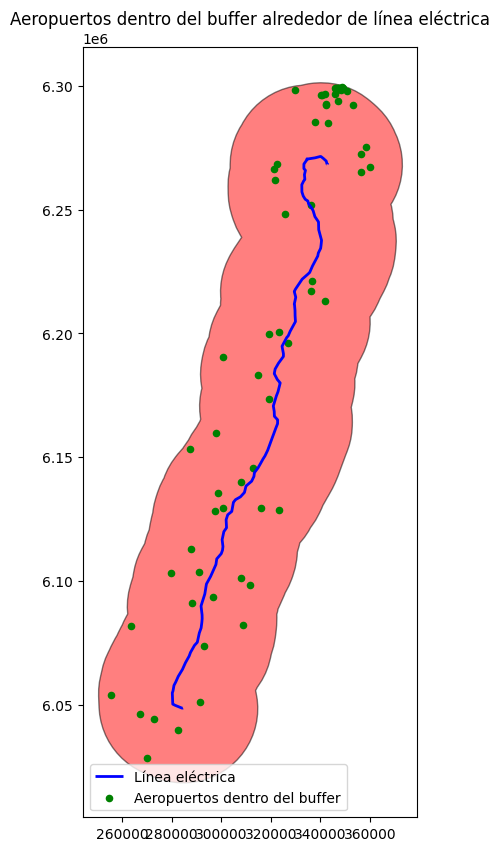

In [62]:
# 5. Visualizamos los resultados
base = buffer_linea.plot(color='red', edgecolor='black', alpha=0.5, figsize=(10, 10))
linea_seleccionada.plot(ax=base, color='blue', linewidth=2, label='Línea eléctrica')
aeropuertos_en_buffer.plot(ax=base, color='green', markersize=20, label='Aeropuertos dentro del buffer')
plt.legend()
plt.title('Aeropuertos dentro del buffer alrededor de línea eléctrica')
plt.show()

In [63]:
lineas_seleccionadas = electric_lines_5361[electric_lines_5361['TRAMO'].str.contains("NUEVA", case=False, na=False)]

In [64]:
# 2. Crear el buffer para todas las líneas seleccionadas (por ejemplo, 30 km)
buffer_metros = 30000
buffers_lineas = lineas_seleccionadas.buffer(distance=buffer_metros)

In [66]:

# 3. Crear GeoDataFrame del buffer (con el mismo CRS)
buffers_gdf = gpd.GeoDataFrame(geometry=buffers_lineas, crs=electric_lines_5361.crs)

In [67]:
# 4. Mapa base con el buffer en rojo
base = buffers_gdf.explore(color='yellow', style_kwds={'fillOpacity': 0.2}, name="Buffers")

# 5. Agregar las líneas eléctricas en azul
lineas_seleccionadas.explore(m=base, color='blue', style_kwds={'weight':2}, name="Líneas eléctricas")

# 6. (Opcional) Agregar aeropuertos en negro
airports_5361.explore(m=base, color='black', marker_kwds={'radius':4}, name="Aeropuertos")

# 7. Mostrar mapa (con control de capas)
import folium
folium.LayerControl().add_to(base)
base

In [68]:
# 4. Filtrar aeropuertos que están dentro del buffer
airports_dentro_buffer = airports_5361.clip(buffers_gdf)

In [69]:
# 5. Mapa base con buffers (rojo)
base = buffers_gdf.explore(color='yellow', style_kwds={'fillOpacity': 0.2}, name="Buffers")

# 6. Agregar líneas eléctricas (azul)
lineas_seleccionadas.explore(m=base, color='blue', style_kwds={'weight':2}, name="Líneas eléctricas")

# 7. Agregar solo los aeropuertos dentro del buffer (negro)
airports_dentro_buffer.explore(m=base, color='black', marker_kwds={'radius':4}, name="Aeropuertos en buffer")

# 8. Control de capas
folium.LayerControl().add_to(base)
base